# Informações adicionais

## Modelagem dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [2]:
dados = pd.read_csv('Anuário Estatístico 2019 - Evolução da produção de gás natural, por localização.csv', sep = ';', decimal = ',')

In [3]:
nordeste_onshore = dados.loc[(dados['UF'] == 'Alagoas') & (dados['Localização'] == 'Terra') |
                             (dados['UF'] == 'Bahia') & (dados['Localização'] == 'Terra') | 
                             (dados['UF'] == 'Ceará') & (dados['Localização'] == 'Terra') |
                             (dados['UF'] == 'Maranhão') & (dados['Localização'] == 'Terra') |
                             (dados['UF'] == 'Rio Grande do Norte') & (dados['Localização'] == 'Terra') |
                             (dados['UF'] == 'Sergipe') & (dados['Localização'] == 'Terra')]
nordeste_offshore = dados.loc[(dados['UF'] == 'Alagoas') & (dados['Localização'] == 'Mar') |
                             (dados['UF'] == 'Bahia') & (dados['Localização'] == 'Mar') | 
                             (dados['UF'] == 'Ceará') & (dados['Localização'] == 'Mar') |
                             (dados['UF'] == 'Maranhão') & (dados['Localização'] == 'Mar') |
                             (dados['UF'] == 'Rio Grande do Norte') & (dados['Localização'] == 'Mar') |
                             (dados['UF'] == 'Sergipe') & (dados['Localização'] == 'Mar')]
nordeste_total = dados.loc[(dados['UF'] == 'Alagoas')  |
                             (dados['UF'] == 'Bahia')  | 
                             (dados['UF'] == 'Ceará')  |
                             (dados['UF'] == 'Maranhão') |
                             (dados['UF'] == 'Rio Grande do Norte') |
                             (dados['UF'] == 'Sergipe')]

In [4]:
def modelagem(n):
    n['Produção de gás natural (milhões m3)'] = n['Produção de gás natural (milhões m3)'].mul(1000000)
    n = n.rename(columns = {'Produção de gás natural (milhões m3)' : 'Produção de gás natural (m³)'})
    n = n.groupby(['Ano'])['Produção de gás natural (m³)'].sum().to_frame().reset_index()
    return n

nordeste_onshore = modelagem(nordeste_onshore)
nordeste_offshore = modelagem(nordeste_offshore)
nordeste_total = modelagem(nordeste_total)

In [5]:
def grafico(n):
    plt.figure(figsize = (10, 5))
    plt.xticks(n['Ano'])
    if n is nordeste_onshore:            
        sns.barplot(x = 'Ano', y = 'Produção de gás natural (m³)', color = 'brown', data = nordeste_onshore)
        plt.title('Produção de gás natural onshore na região Nordeste', fontsize = 16, fontweight = 'bold')
    elif n is nordeste_offshore:
        sns.barplot(x = 'Ano', y = 'Produção de gás natural (m³)', color = 'blue', data = nordeste_offshore)
        plt.title('Produção de gás natural offshore na região Nordeste', fontsize = 16, fontweight = 'bold')
    elif n is nordeste_total:
        sns.barplot(x = 'Ano', y = 'Produção de gás natural (m³)', color = 'black', data = nordeste_total)
        plt.title('Produção de gás natural total na região Nordeste', fontsize = 16, fontweight = 'bold')
    plt.show()

In [6]:
nordeste_onshore_ts = copy.deepcopy(nordeste_onshore)
nordeste_offshore_ts = copy.deepcopy(nordeste_offshore)
nordeste_total_ts = copy.deepcopy(nordeste_total)

In [7]:
def time_series(time):
    time['Ano'] = pd.to_datetime(time['Ano'].astype(str), format = '%Y')
    time = time.set_index('Ano')
    return time

In [8]:
nordeste_onshore_ts = time_series(nordeste_onshore_ts) # [1, 0, 0]
nordeste_offshore_ts = time_series(nordeste_offshore_ts) # [1, 0, 0]
nordeste_total_ts = time_series(nordeste_total_ts) # [1, 0, 0]

In [9]:
#modelo_auto = auto_arima(nordeste_onshore_ts, m = 2, seasonal = False, trace = True)
#modelo_auto.summary()

In [10]:
modelo_nordeste_onshore = ARIMA(nordeste_onshore_ts, order = [1, 0, 0])
modelo_treinado_nordeste_onshore = modelo_nordeste_onshore.fit()

modelo_nordeste_offshore = ARIMA(nordeste_offshore_ts, order = [1, 0, 0])
modelo_treinado_nordeste_offshore = modelo_nordeste_offshore.fit()

modelo_nordeste_total = ARIMA(nordeste_total_ts, order = [1, 0, 0])
modelo_treinado_nordeste_total = modelo_nordeste_total.fit()

In [11]:
previsoes_onshore = modelo_treinado_nordeste_onshore.forecast(steps = 2)[0]
previsoes_offshore = modelo_treinado_nordeste_offshore.forecast(steps = 2)[0]
previsoes_total = modelo_treinado_nordeste_total.forecast(steps = 2)[0]

## Gráfico da produção de gás natural onshore e sua previsão

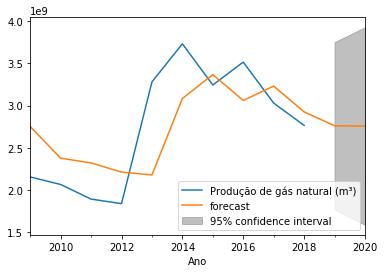

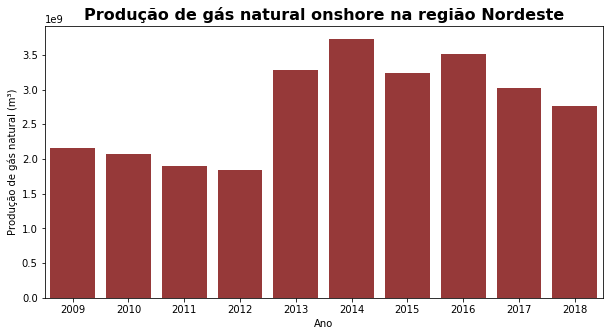

In [12]:
eixo_onshore = nordeste_onshore_ts.plot()

modelo_treinado_nordeste_onshore.plot_predict('2009-01-01', '2020-01-01', ax = eixo_onshore, plot_insample = False)
grafico(nordeste_onshore)

De acordo com ambos os gráficos, podemos perceber que a previsão de produção de gás natural onshore tende a ser estável para os próximos 2 anos.

## Gráfico da produção de gás natural offshore e sua previsão

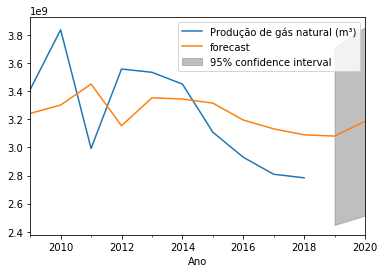

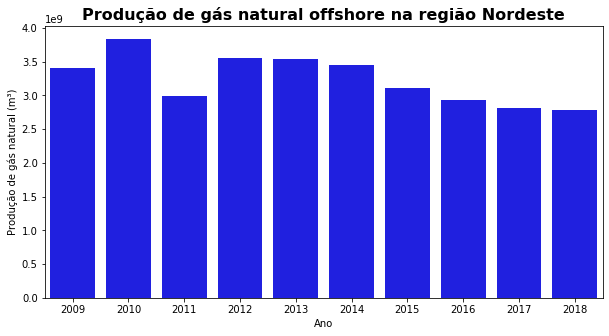

In [13]:
eixo_offshore = nordeste_offshore_ts.plot()

modelo_treinado_nordeste_offshore.plot_predict('2009-01-01', '2020-01-01', ax = eixo_offshore, plot_insample = False)
grafico(nordeste_offshore)

De acordo com ambos os gráficos, podemos perceber que a previsão de produção de gás natural offshore tende a ser positiva para os próximos 2 anos.

## Gráfico da produção de gás natural total e sua previsão

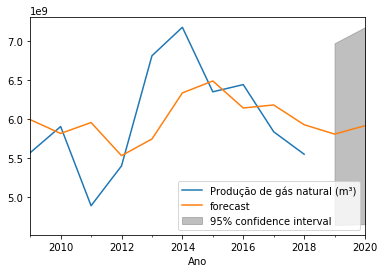

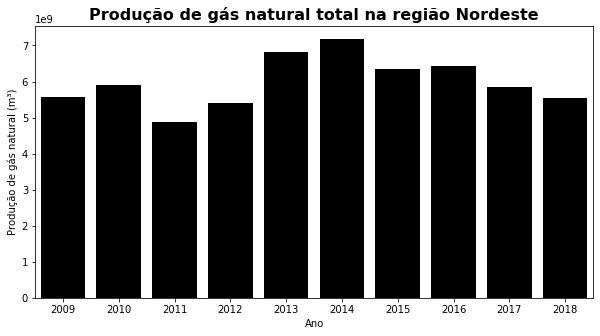

In [14]:
eixo_total = nordeste_total_ts.plot()

modelo_treinado_nordeste_total.plot_predict('2009-01-01', '2020-01-01', ax = eixo_total, plot_insample = False)
grafico(nordeste_total)

De acordo com ambos os gráficos, podemos perceber que a previsão de produção de gás natural total tende a ser positiva para os próximos 2 anos.